In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
df=pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
df[df['person_emp_length']>df['person_age']]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


### These 2 records need to be discard as employment length is greater than person's age 

In [6]:
df=df.drop([0,210]).reset_index(drop=True)

### Setting NA values in loan_int_rate to the mean value of the columns

In [7]:
df['loan_int_rate']=df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

In [8]:
df.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             895
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

### Setting all NA values to 0 in person_emp_length. Assuming they didn't have employment before or they don't do job  

In [9]:
df=df.fillna(0)

In [10]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# Dealing with outliers

In [11]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32579.000000,3.257900e+04,32579.000000,32579.000000,32579.000000,32579.000000,32579.000000,32579.000000
mean,27.734983,6.607120e+04,4.650849,9588.271586,11.011677,0.218147,0.170193,5.804352
std,6.348084,6.198108e+04,4.055131,6320.449757,3.081475,0.412994,0.106759,4.055084
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011677,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Person Max age given is 144, lets check 

<AxesSubplot:>

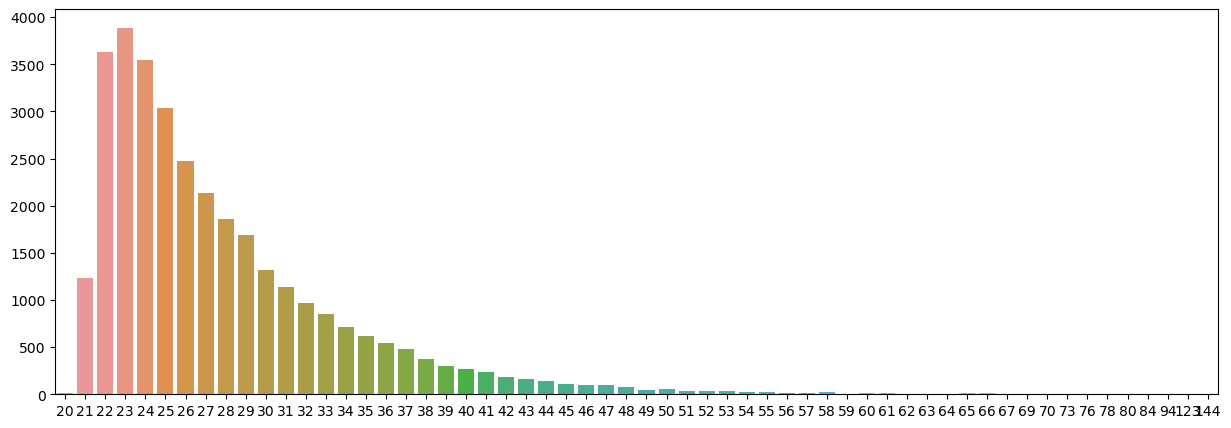

In [12]:
verti = df['person_age'].value_counts().values
hori = df['person_age'].value_counts().index
plt.figure(figsize=(15,5))
sns.barplot(x=hori,y=verti)


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_age'>

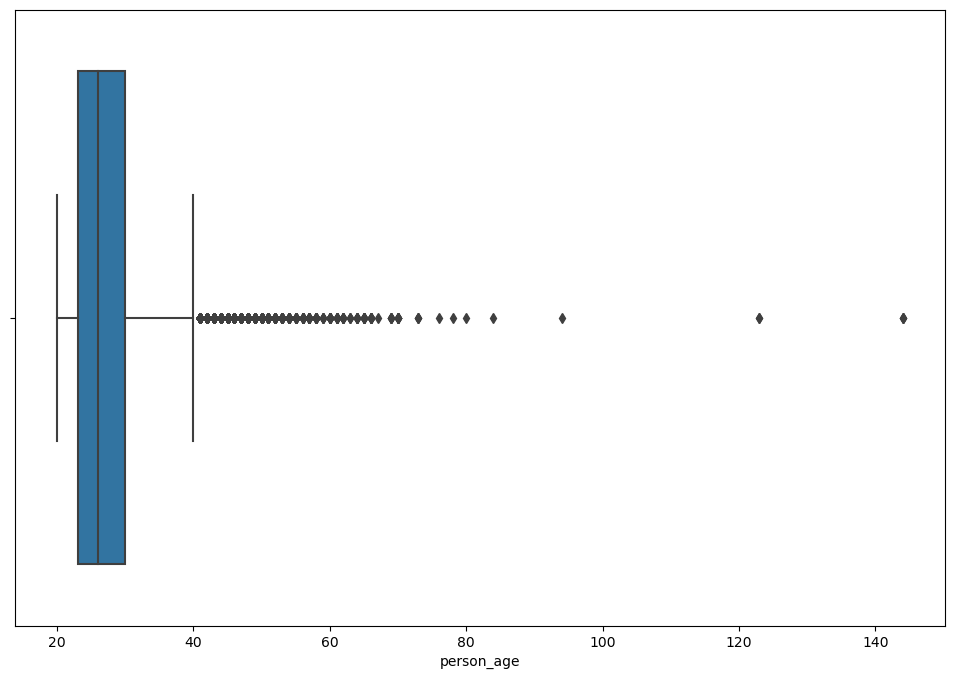

In [13]:
sns.boxplot(df['person_age'])

### According to Box plot, age above 40 are all outliers<br> So, we'll remove values above 75 as till then density is high

In [14]:
df=df.drop(df[df['person_age']>75].index).reset_index(drop=True)

In [15]:
df.shape

(32569, 12)

# EDA

<AxesSubplot:>

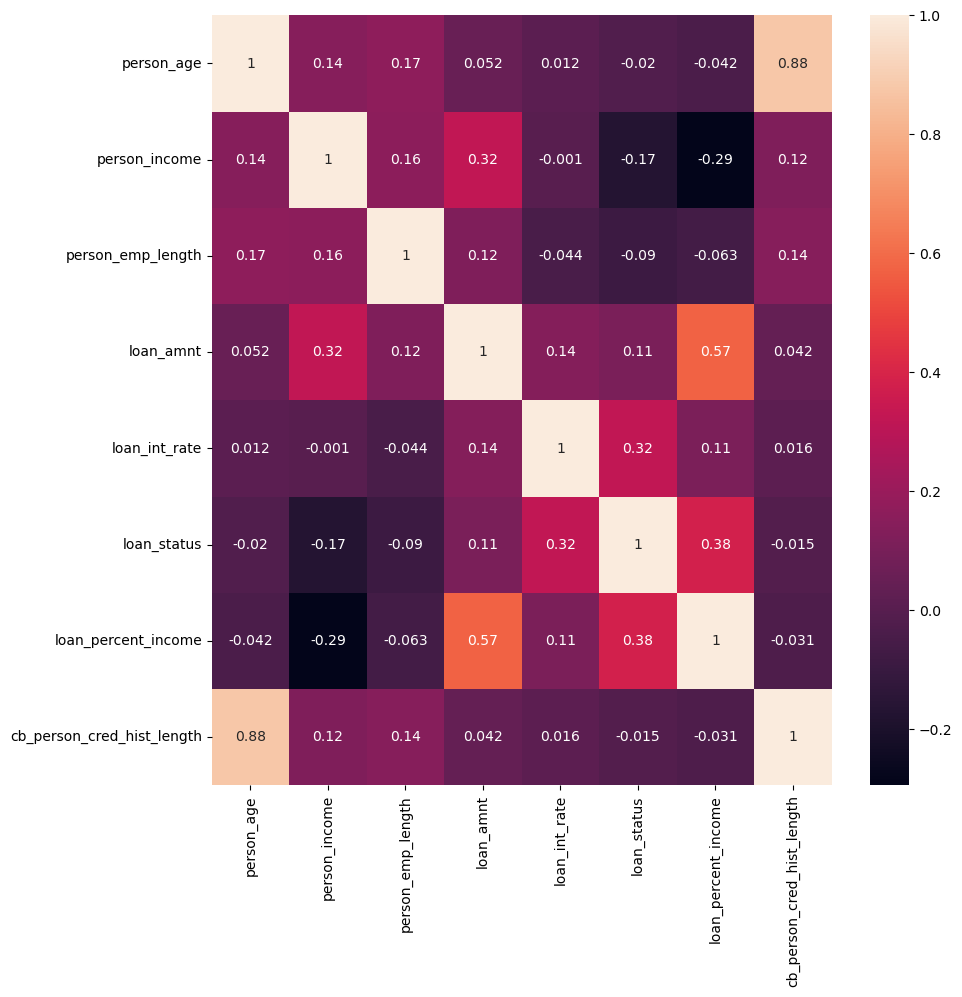

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### Observations:<br>
> Person Age and Person's credit length are positive correlated(0.88)<br>
> Loan amount and loan percent income are moderately positive correlated<br>

### Takeaways<br>
> As the person age is more the credit history is more or vice-versa.<br>
> Mostly a person having a high loan amount have high loan percent income i.e. EMI/NMI ratio 

*[EMI/NMI ratio is the proportion of your net monthly income (NMI) spent on servicing your existing EMIs as well as the EMI of the new loan.]


# Kind of loans that people ask for?

In [17]:
df['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [18]:
intent=df.groupby('loan_intent',as_index=False)['loan_intent'].value_counts().sort_values(by='count')
intent

,loan_intent,count
2,HOMEIMPROVEMENT,3605
0,DEBTCONSOLIDATION,5212
4,PERSONAL,5518
5,VENTURE,5716
3,MEDICAL,6067
1,EDUCATION,6451


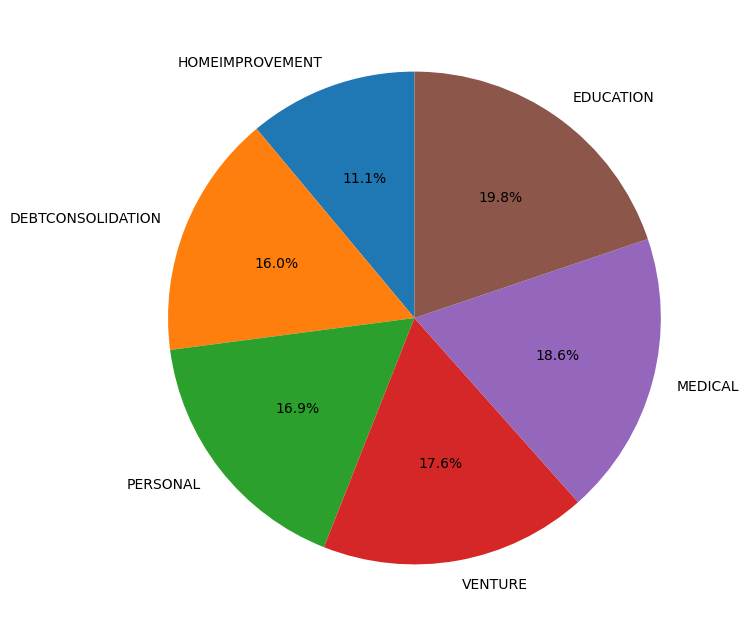

In [19]:
plt.pie(intent['count'],labels=intent['loan_intent'],autopct='%1.1f%%', startangle=90)
plt.show()

### Observations<br>
> Education Loans are the most taken loans followed by Medical<br>
> The least taken loan is for home improvement

# Who takes what loan?

In [20]:
df.groupby(['person_age','loan_intent'])['loan_intent'].count()

person_age  loan_intent      
20          DEBTCONSOLIDATION    2
            EDUCATION            5
            MEDICAL              1
            PERSONAL             2
            VENTURE              5
                                ..
70          DEBTCONSOLIDATION    1
            MEDICAL              4
            PERSONAL             2
73          MEDICAL              2
            PERSONAL             1
Name: loan_intent, Length: 266, dtype: int64

### This is not feasibel, we need to make age in ranges

In [21]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32569.000000,3.256900e+04,32569.000000,32569.000000,32569.000000,32569.000000,32569.000000,32569.000000
mean,27.710031,6.587921e+04,4.649114,9588.221929,11.011800,0.218214,0.170205,5.801130
std,6.167854,5.253510e+04,4.049118,6320.515715,3.081748,0.413040,0.106759,4.047036
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011677,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,73.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [22]:
mn=df['person_age'].min()
ma=df['person_age'].max()
mn,ma

(20, 73)

In [23]:
df['age_group'] = pd.cut(df['person_age'], bins=[19, 28, 35, 45, 55, 60,75],
                           labels=['20-28', '29-35', '36-45', '46-55', '56-60','60-75'])

In [24]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
age_group                     0
dtype: int64

In [25]:
ageIntent = df.groupby(['loan_intent', 'age_group'])['loan_intent'].count()
ageIntent_df = ageIntent.to_frame(name='count').reset_index()
ageIntent_df.sort_values(by=['count','loan_intent'],ascending=False)

,loan_intent,age_group,count
6,EDUCATION,20-28,4772
18,MEDICAL,20-28,3975
30,VENTURE,20-28,3860
24,PERSONAL,20-28,3622
0,DEBTCONSOLIDATION,20-28,3511
12,HOMEIMPROVEMENT,20-28,2079
19,MEDICAL,29-35,1436
31,VENTURE,29-35,1251
25,PERSONAL,29-35,1243
1,DEBTCONSOLIDATION,29-35,1175


<AxesSubplot:xlabel='loan_intent', ylabel='count'>

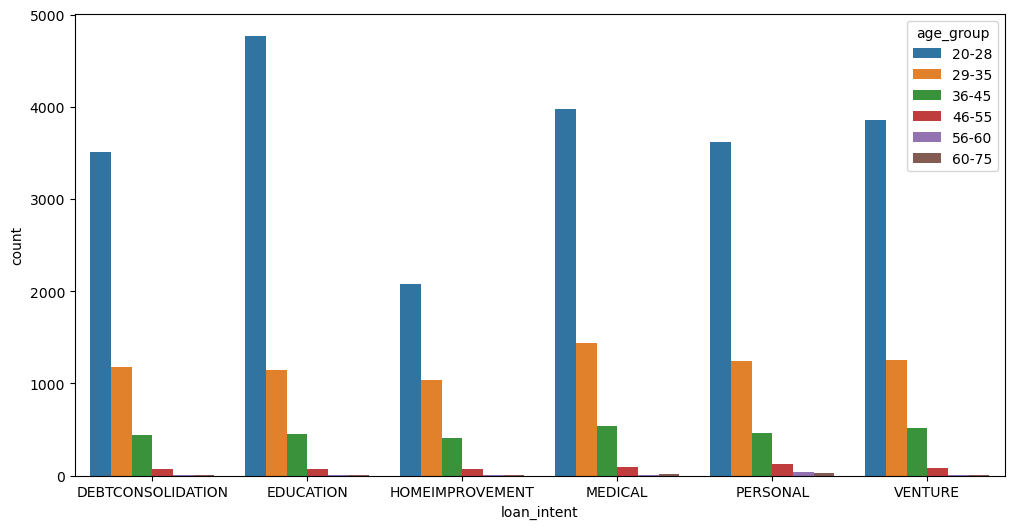

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(data=ageIntent_df, x="loan_intent", y="count", hue="age_group")

### Observations:<br>
> Here we can see, Most of the loans are taken by young adults.<br>
> Old age or retired people are the least to have loans.<br>
> Young Adults take most of the loan for education followed by medical.<br>
> People between 29 and 35 age takes most loan for Medical.

### Key Takeaways:<br>
> Young Adults don't take money from their parents even for education.<br>
> Medical emergencies can be at any age.<br>
> Some people are not afraid of opening business at high age also.<br>
> Peopel at higher age are not inclined to or in no need of loan.

# Most people have their own home or what?

In [27]:
home=df.groupby('person_home_ownership',as_index=False)['person_home_ownership'].value_counts().sort_values(by='count')
home

,person_home_ownership,count
1,OTHER,107
2,OWN,2584
0,MORTGAGE,13440
3,RENT,16438


### Observation: <br>
> Most of the people have thier homes on rent.

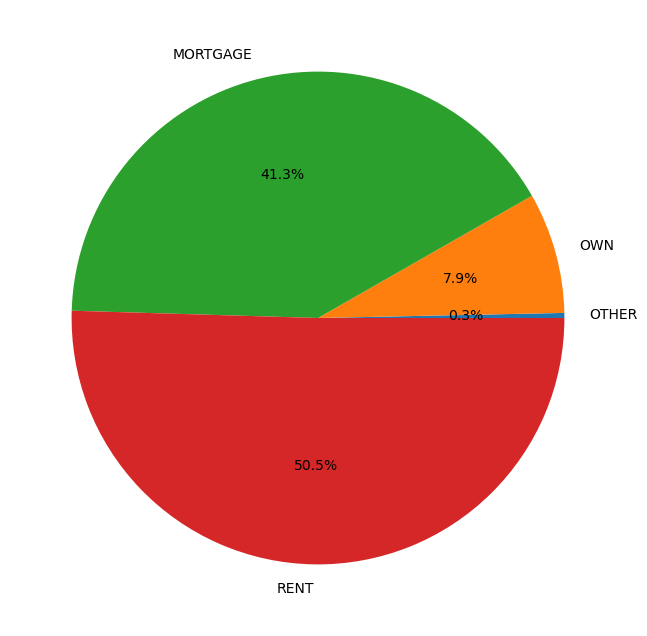

In [28]:
plt.pie(home['count'],labels=home['person_home_ownership'],autopct='%1.1f%%')
plt.show()

In [29]:
# Relation between age anf the kind of home they have 

ageHome=df.groupby(['person_home_ownership','age_group'])['age_group'].count()
ageHome

person_home_ownership  age_group
MORTGAGE               20-28         8737
                       29-35         3236
                       36-45         1190
                       46-55          230
                       56-60           26
                       60-75           21
OTHER                  20-28           82
                       29-35           12
                       36-45           10
                       46-55            3
                       56-60            0
                       60-75            0
OWN                    20-28         1721
                       29-35          565
                       36-45          252
                       46-55           39
                       56-60            7
                       60-75            0
RENT                   20-28        11279
                       29-35         3481
                       36-45         1362
                       46-55          241
                       56-60           36
 

### Observations:<br>
> Person's above age 60 do not have thier own home.<br>
> In all cases people between 20-28 are above.

# How Loan grade affects by loan intent, and Person Income?

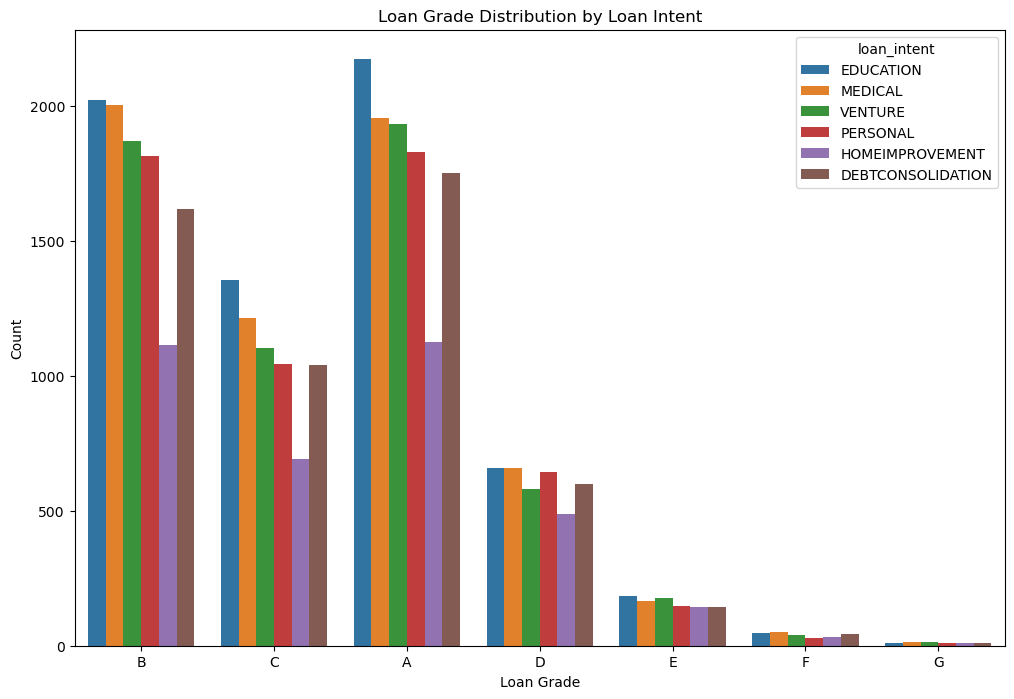

In [30]:
sns.countplot(x='loan_grade', hue='loan_intent', data=df)
plt.title('Loan Grade Distribution by Loan Intent')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.show()

### Observations: <br>
> Loan Grade shows, it is difficult to get loan when its grade is below 'C'

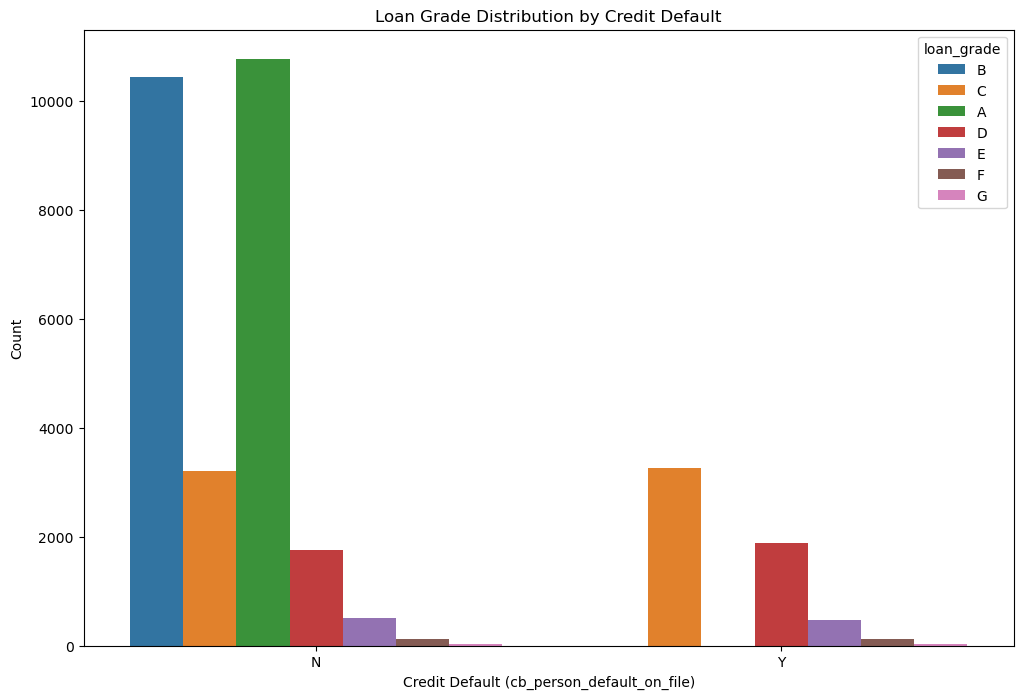

In [31]:
sns.countplot(x='cb_person_default_on_file', hue='loan_grade', data=df)
plt.title('Loan Grade Distribution by Credit Default')
plt.xlabel('Credit Default (cb_person_default_on_file)')
plt.ylabel('Count')
plt.show()

# Observations:<br>
> Loan grade A and B people have never deafult.<br>
> Mostly grade C people have deafulted. This can be because these are the ones in middle, which causes confusion to give loan or not.<br>
> People with loan grade C and D are the ones with 50% chance of repaying.

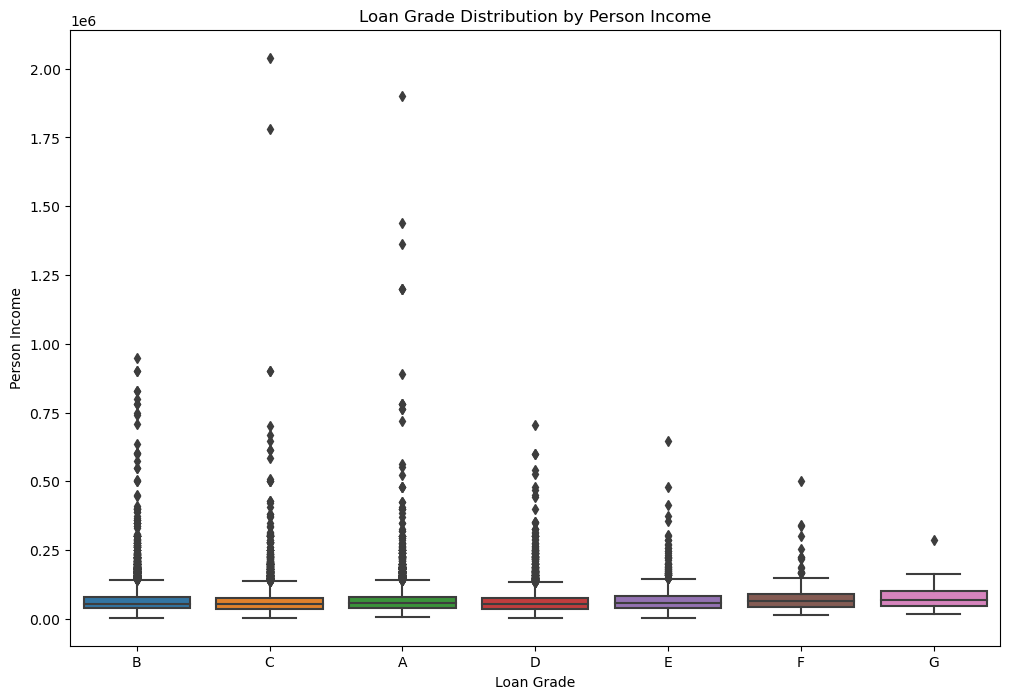

In [32]:
sns.boxplot(x='loan_grade', y='person_income', data=df)
plt.title('Loan Grade Distribution by Person Income')
plt.xlabel('Loan Grade')
plt.ylabel('Person Income')
plt.show()

### Observations: <br>
> Loan grade 'G' shows all people with low income.<br>
> It can be seen there is no direct relation between income and grade but its more likely to have lower grade if income is low

# How loan Interest is affected?

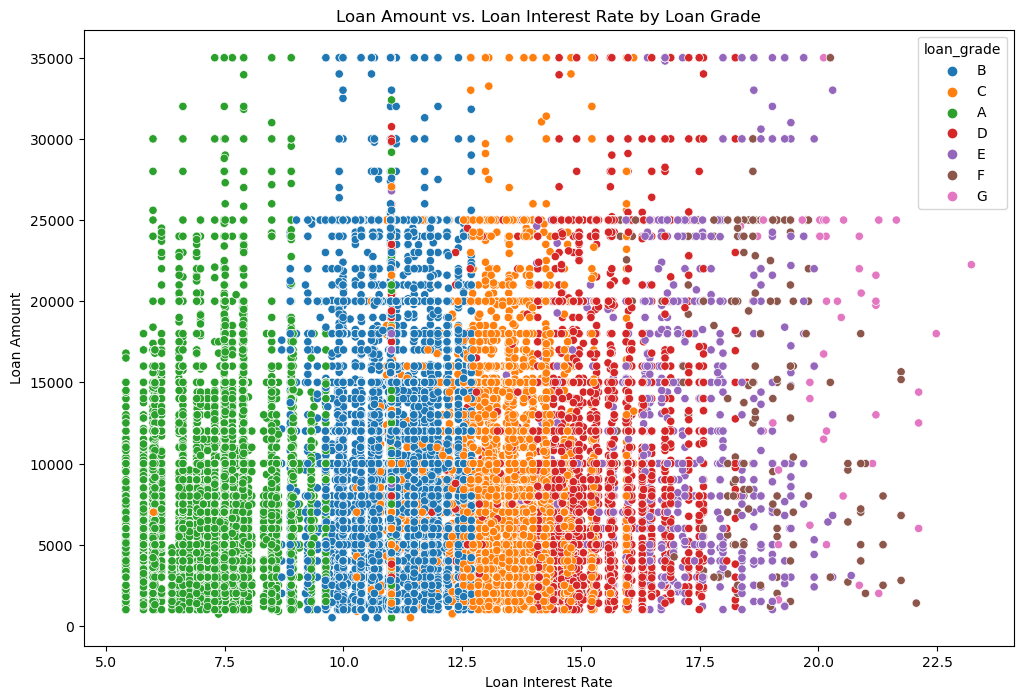

In [33]:
sns.scatterplot(x='loan_int_rate', y='loan_amnt', hue='loan_grade', data=df)
plt.title('Loan Amount vs. Loan Interest Rate by Loan Grade')
plt.xlabel('Loan Interest Rate')
plt.ylabel('Loan Amount')
plt.show()

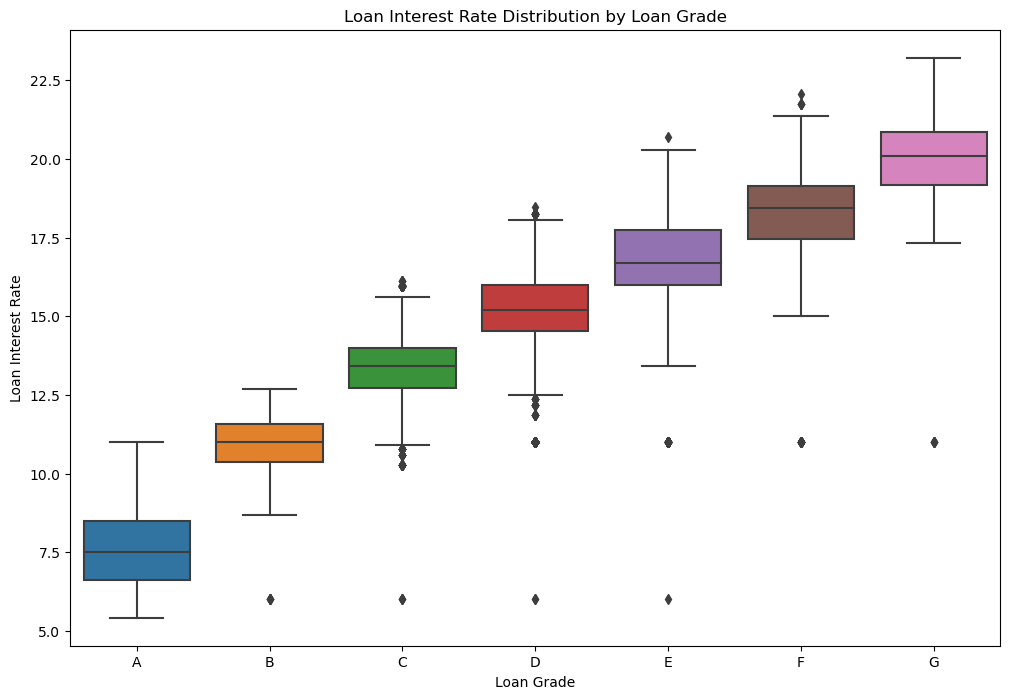

In [34]:
sns.boxplot(x='loan_grade', y='loan_int_rate', data=df, order=sorted(df['loan_grade'].unique()))
plt.title('Loan Interest Rate Distribution by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Loan Interest Rate')
plt.show()

### Observations: <br>
> Loan Interest Rate is high for lower grades loan as they can default.

# Is there any trend between loan amount and person age?

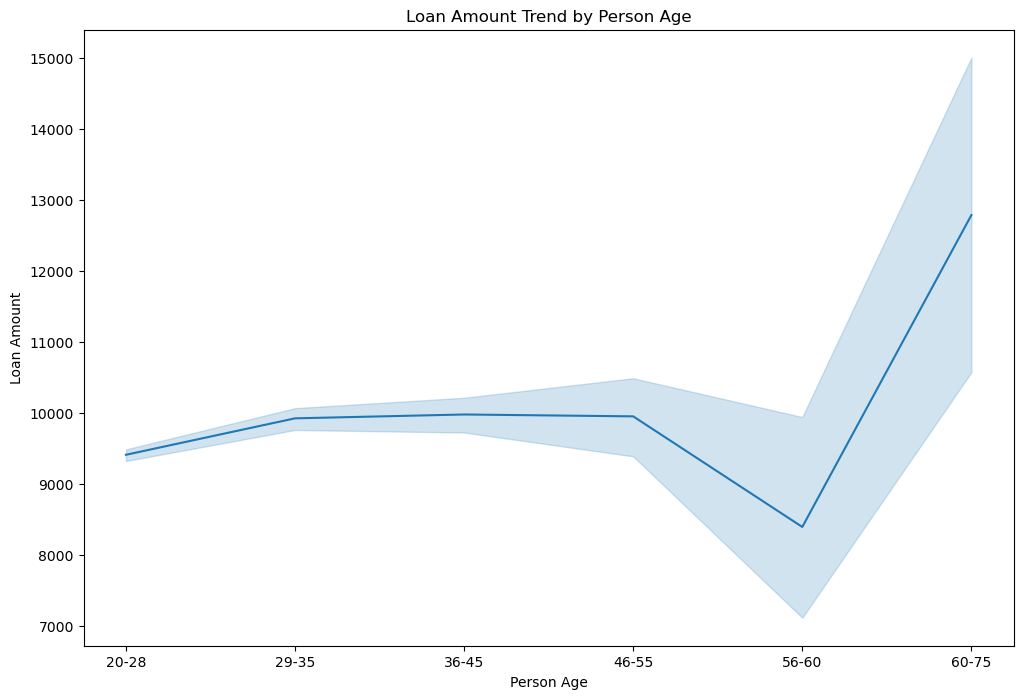

In [35]:
sns.lineplot(x='age_group', y='loan_amnt', data=df)
plt.title('Loan Amount Trend by Person Age')
plt.xlabel('Person Age')
plt.ylabel('Loan Amount')
plt.show()

# Observations:<br>
> People of age greater than 60 do not need loans mostly, but when they need the amount is large 

# Feature Engineering

In [36]:
# Loan-to-income ratio
df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']

# Interest rate-to-loan amount ratio
df['int_rate_to_loan_amt_ratio'] = df['loan_int_rate'] / df['loan_amnt']


In [37]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,loan_to_income_ratio,int_rate_to_loan_amt_ratio
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-28,0.104167,0.011140
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-28,0.572917,0.002340
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-28,0.534351,0.000435
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-28,0.643382,0.000408
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-28,0.252525,0.002856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32564,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,56-60,0.109434,0.002269
32565,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,46-55,0.146875,0.000425
32566,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,60-75,0.460526,0.000314
32567,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,56-60,0.100000,0.000765


# Model 1

# Defining X and y

In [38]:
X_df=df.drop(['loan_status','person_age'],axis=1)
X=X_df.iloc[:,:].values
print(X)
print("\nX shape =",X.shape)

y=df.iloc[:,8].values
print("\n",y)
print("\nY shape =",y.shape)

[[9600 'OWN' 5.0 ... '20-28' 0.10416666666666667 0.01114]
 [9600 'MORTGAGE' 1.0 ... '20-28' 0.5729166666666666 0.00234]
 [65500 'RENT' 4.0 ... '20-28' 0.5343511450381679 0.00043514285714285714]
 ...
 [76000 'RENT' 3.0 ... '60-75' 0.4605263157894737 0.000314]
 [150000 'MORTGAGE' 5.0 ... '56-60' 0.1 0.0007653333333333334]
 [42000 'RENT' 2.0 ... '60-75' 0.15416666666666667 0.001542857142857143]]

X shape = (32569, 13)

 [0 1 1 ... 1 0 0]

Y shape = (32569,)


In [39]:
X[0]

array([9600, 'OWN', 5.0, 'EDUCATION', 'B', 1000, 11.14, 0.1, 'N', 2,
       '20-28', 0.10416666666666667, 0.01114], dtype=object)

# Encoding

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,3,4,10])],remainder='passthrough')
X=ct.fit_transform(X)
print(X)
X[0]

[[0.0 0.0 1.0 ... 2 0.10416666666666667 0.01114]
 [1.0 0.0 0.0 ... 3 0.5729166666666666 0.00234]
 [0.0 0.0 0.0 ... 2 0.5343511450381679 0.00043514285714285714]
 ...
 [0.0 0.0 0.0 ... 28 0.4605263157894737 0.000314]
 [1.0 0.0 0.0 ... 26 0.1 0.0007653333333333334]
 [0.0 0.0 0.0 ... 30 0.15416666666666667 0.001542857142857143]]


array([0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9600, 5.0, 1000,
       11.14, 0.1, 'N', 2, 0.10416666666666667, 0.01114], dtype=object)

In [41]:
feature_names = ct.get_feature_names_out()

# Print the original values and their corresponding encoded features
for i, feature in enumerate(feature_names):
    print(f"Encoded feature '{feature}' corresponds to original value {i}")

Encoded feature 'encoder__x1_MORTGAGE' corresponds to original value 0
Encoded feature 'encoder__x1_OTHER' corresponds to original value 1
Encoded feature 'encoder__x1_OWN' corresponds to original value 2
Encoded feature 'encoder__x1_RENT' corresponds to original value 3
Encoded feature 'encoder__x3_DEBTCONSOLIDATION' corresponds to original value 4
Encoded feature 'encoder__x3_EDUCATION' corresponds to original value 5
Encoded feature 'encoder__x3_HOMEIMPROVEMENT' corresponds to original value 6
Encoded feature 'encoder__x3_MEDICAL' corresponds to original value 7
Encoded feature 'encoder__x3_PERSONAL' corresponds to original value 8
Encoded feature 'encoder__x3_VENTURE' corresponds to original value 9
Encoded feature 'encoder__x4_A' corresponds to original value 10
Encoded feature 'encoder__x4_B' corresponds to original value 11
Encoded feature 'encoder__x4_C' corresponds to original value 12
Encoded feature 'encoder__x4_D' corresponds to original value 13
Encoded feature 'encoder__x

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
xx=le.fit_transform(X[:,-4])
X[:,-4]=xx
X[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9600, 5.0, 1000,
       11.14, 0.1, 0, 2, 0.10416666666666667, 0.01114], dtype=object)

In [43]:
original_labels = le.classes_

# Print the original labels and their corresponding encoded values
for label, encoded_value in zip(original_labels, np.unique(xx)):
    print(f"Encoded value {encoded_value} corresponds to label '{label}'")

Encoded value 0 corresponds to label 'N'
Encoded value 1 corresponds to label 'Y'


In [44]:
print("X shape =",X.shape)

X shape = (32569, 32)


# Splitting Data

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [46]:
print(X_train,"\n\n X_train shape =",X_train.shape)
print("\n\n")
print(X_test,"\n\n X_train shape =",X_test.shape)

[[1.0 0.0 0.0 ... 12 0.20590277777777777 0.0004067453625632378]
 [0.0 0.0 0.0 ... 5 0.21428571428571427 0.0014511111111111111]
 [0.0 0.0 0.0 ... 13 0.13333333333333333 0.0006258333333333333]
 ...
 [0.0 0.0 0.0 ... 4 0.225 0.0011766666666666666]
 [0.0 0.0 0.0 ... 2 0.23809523809523808 0.001299]
 [0.0 0.0 0.0 ... 4 0.2564102564102564 0.0010925]] 

 X_train shape = (26055, 32)



[[0.0 0.0 0.0 ... 4 0.45004500450045004 0.0005138888888888889]
 [1.0 0.0 0.0 ... 4 0.13376288659793814 0.0005325626204238922]
 [0.0 0.0 0.0 ... 2 0.09482758620689655 0.0008127272727272727]
 ...
 [0.0 0.0 0.0 ... 9 0.25 0.000566]
 [1.0 0.0 0.0 ... 17 0.26785714285714285 0.001032]
 [1.0 0.0 0.0 ... 6 0.12 0.0007822916666666666]] 

 X_train shape = (6514, 32)


# Feature Scaling

In [47]:
for i, value in enumerate(X_test[0]):
    print(f"Index {i}: {value}")

Index 0: 0.0
Index 1: 0.0
Index 2: 0.0
Index 3: 1.0
Index 4: 0.0
Index 5: 1.0
Index 6: 0.0
Index 7: 0.0
Index 8: 0.0
Index 9: 0.0
Index 10: 0.0
Index 11: 1.0
Index 12: 0.0
Index 13: 0.0
Index 14: 0.0
Index 15: 0.0
Index 16: 0.0
Index 17: 1.0
Index 18: 0.0
Index 19: 0.0
Index 20: 0.0
Index 21: 0.0
Index 22: 0.0
Index 23: 39996
Index 24: 2.0
Index 25: 18000
Index 26: 9.25
Index 27: 0.45
Index 28: 0
Index 29: 4
Index 30: 0.45004500450045004
Index 31: 0.0005138888888888889


In [48]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()

selected_features_indices = [23,24, 25, 26, 27, 29,30,31]
X_train[:,selected_features_indices]=sc.fit_transform(X_train[:,selected_features_indices])
X_test[:,selected_features_indices]=sc.transform(X_test[:,selected_features_indices])
X_train[0],X_test[0]

(array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        0.11566188449560758, -0.6533723664691132, 0.8196158598894598,
        -1.6183872481586081, 0.367418071690471, 0, 1.5293503785730012,
        0.3249897756317715, -0.7856180773172118], dtype=object),
 array([0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        -0.48974729552908663, -0.6533723664691132, 1.3192778053247673,
        -0.573284070790698, 2.6062108354639104, 0, -0.4430159633220155,
        2.596216423095393, -0.7285379142009143], dtype=object))

# Traininig

In [49]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

svc = SVC()
knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
xgb = XGBClassifier()

In [50]:
clfs = {
    'SVC':svc,
    'KN' : knc,
    'Decison_Tree':dtc,
    'Logistic':lrc,
    'Random_Forest':rfc,
    'xgb':xgb
}

In [51]:
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    return accuracy,precision,confusion_mat

In [52]:
accuracy_scores = []
precision_scores = []
confusion_matrices = []  # TN FP and FN TP

for name,clf in clfs.items():#
    current_accuracy,current_precision,current_confusion = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("\n\nFor ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Confusion Matrix:")
    print(current_confusion)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    confusion_matrices.append(current_confusion)



For  SVC
Accuracy -  0.9138778016579675
Precision -  0.9240374609781478
Confusion Matrix:
[[5065   73]
 [ 488  888]]


For  KN
Accuracy -  0.893920785999386
Precision -  0.8361138370951914
Confusion Matrix:
[[4971  167]
 [ 524  852]]


For  Decison_Tree
Accuracy -  0.8868590727663495
Precision -  0.7220291869353718
Confusion Matrix:
[[4738  400]
 [ 337 1039]]


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




For  Logistic
Accuracy -  0.8738102548357384
Precision -  0.7710371819960861
Confusion Matrix:
[[4904  234]
 [ 588  788]]


For  Random_Forest
Accuracy -  0.9310715382253607
Precision -  0.9566502463054187
Confusion Matrix:
[[5094   44]
 [ 405  971]]


For  xgb
Accuracy -  0.933527786306417
Precision -  0.9529298751200769
Confusion Matrix:
[[5089   49]
 [ 384  992]]


# Confusion Matrix :<br>
> True Negative (TN): The number of observations that are actually non-default (0) and are predicted as non-default (0).<br>
> False Positive (FP): The number of observations that are actually non-default (0) but are predicted as default (1). <br>
> False Negative (FN): The number of observations that are actually default (1) but are predicted as non-default (0).<br>
> True Positive (TP): The number of observations that are actually default (1) and are predicted as default (1). 

### Now, Random Forest Classifier and XGB have good accuracy and Precision <br> But we need to decrease the values in False Negative, otherwise the loan lender will face loss

In [53]:
# Logistic
y_pred_prob = lrc.predict_proba(X_test)[:, 1]  # Probability of positive class

threshold = 0.3

# Apply the new threshold to classify instances
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

confusion = confusion_matrix(y_test, y_pred_adjusted)
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)

print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)

Confusion Matrix:
[[4547  591]
 [ 360 1016]]
Accuracy: 0.8540067546822229
Precision: 0.6322339763534537


In [54]:
# XGB
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

# Adjust threshold (e.g., 0.3) to increase sensitivity/recall
threshold = 0.3
y_pred = (y_pred_proba >= threshold).astype(int)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion_matrix)

Accuracy: 0.9260055265581824
Precision: 0.8525236593059937
Confusion Matrix:
[[4951  187]
 [ 295 1081]]


# Finalizing XGB Classifier Model with threshold 0.3

In [55]:
import xgboost as xgb

class XGBClassifierThreshold(xgb.XGBClassifier): #Child Class
    def __init__(self, threshold=0.3, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    
    def predict(self, X, **kwargs):
        y_pred_proba = self.predict_proba(X)[:, 1]
        y_pred = (y_pred_proba >= self.threshold).astype(int)
        return y_pred

# Train the XGBoost Classifier with the default threshold
xgb_classifier = XGBClassifierThreshold()
xgb_classifier.fit(X_train, y_train)

# Get the predictions using the adjusted threshold
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy, precision, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
#cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Confusion Matrix:")
#print(cm)


[10:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "threshold" } are not used.

Accuracy: 0.9260055265581824
Precision: 0.8525236593059937
Confusion Matrix:


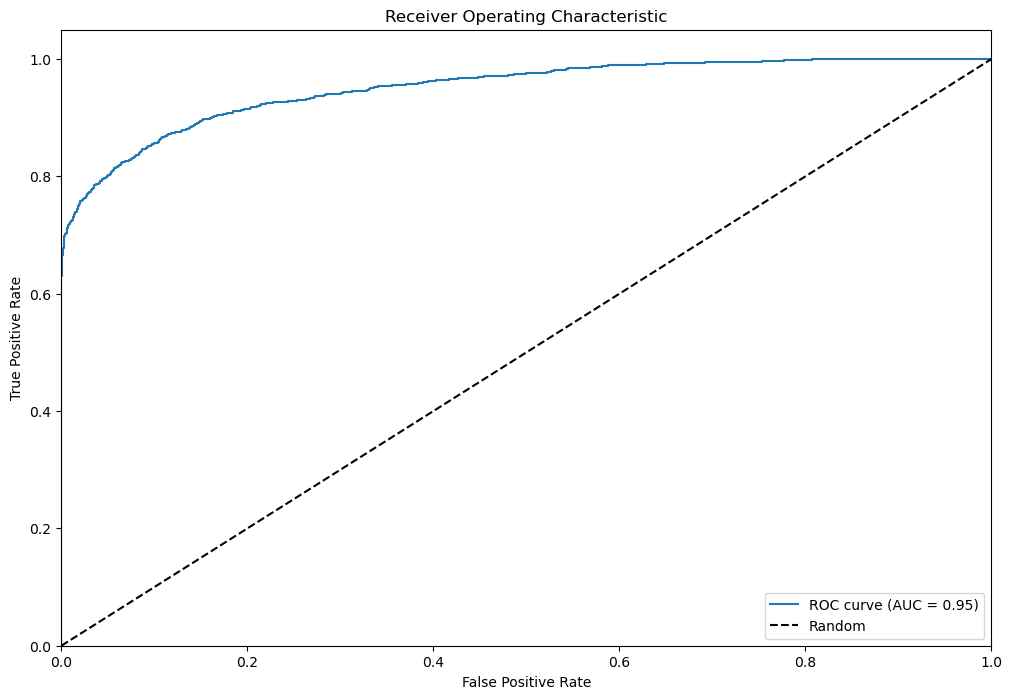

In [56]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for positive class
y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [57]:
hyperparameters = xgb_classifier.get_params()

# Print all hyperparameters
for param, value in hyperparameters.items():
    print(param, "=", value)

threshold = 0.3
objective = binary:logistic
use_label_encoder = None
base_score = None
booster = None
callbacks = None
colsample_bylevel = None
colsample_bynode = None
colsample_bytree = None
early_stopping_rounds = None
enable_categorical = False
eval_metric = None
feature_types = None
gamma = None
gpu_id = None
grow_policy = None
importance_type = None
interaction_constraints = None
learning_rate = None
max_bin = None
max_cat_threshold = None
max_cat_to_onehot = None
max_delta_step = None
max_depth = None
max_leaves = None
min_child_weight = None
missing = nan
monotone_constraints = None
n_estimators = 100
n_jobs = None
num_parallel_tree = None
predictor = None
random_state = None
reg_alpha = None
reg_lambda = None
sampling_method = None
scale_pos_weight = None
subsample = None
tree_method = None
validate_parameters = None
verbosity = None


# To input values for prediction<br>
> [person_income<br>person_home_ownership(Own/Mortgage/Rent/Other)<br> person_emp_length<br>loan_intent<br>loan_grade(A/B/C/D/E/F/G)<br> loan_amount<br> loan_interest_rate<br>loan_percent_income<br>cb_person_default_on_file(Y/N)<br>cb_person_cred_hist_length<br>age_group('20-28', '29-35', '36-45', '46-55', '56-60','60-75')<br>loan_amount/person_income<br>loan_interest_rate/loan_amount]

# ----------------------------------------------------------------------------------------------------------

# Model 2

In [58]:
X = df[['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group']]
y = df['loan_grade']


In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Encode categorical variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2, 4, 5, 7])], remainder='passthrough')
X = ct.fit_transform(X)

# Scale numerical variables
scaler = StandardScaler()
X[:, -2:] = scaler.fit_transform(X[:, -2:])


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest Classifier
rfc = RandomForestClassifier()

# Train the model
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [62]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Calculate accuracy, precision, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.4140313171630335
Precision: 0.3975899756544602
Confusion Matrix:
[[1049  877  133   53    8    3    1]
 [ 902  979  131   64   11    5    0]
 [ 290  293  535  156   17    2    1]
 [ 145  160  292  131   12    4    0]
 [  45   48   66   26    3    0    0]
 [  13   16   20    8    0    0    0]
 [   5    2    6    2    0    0    0]]


In [63]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 41.39 %
Standard Deviation: 0.57 %


# Hyperparameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rfc, param_grid=parameters, cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Hyperparameters:", best_params)


Best Accuracy: 46.87 %
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}


In [65]:
best_rfc = RandomForestClassifier(**best_params)
best_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=300)

In [66]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Make predictions on the test set
y_pred = best_rfc.predict(X_test)

# Calculate accuracy, precision, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.4723672090881179
Precision: 0.48250156506408054
Confusion Matrix:
[[1215  909    0    0    0    0    0]
 [ 888 1203    0    1    0    0    0]
 [ 267  385  634    8    0    0    0]
 [ 145  205  369   25    0    0    0]
 [  39   65   84    0    0    0    0]
 [  12   19   24    2    0    0    0]
 [   4    3    7    1    0    0    0]]


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Neural Network

In [67]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Preprocess the data
X = df.iloc[:, [0, 1, 2, 3, 10, 11, 12]].values
y = df['loan_grade'].values

X[0],y

(array([21, 9600, 'OWN', 5.0, 'N', 2, '20-28'], dtype=object),
 array(['B', 'C', 'C', ..., 'B', 'B', 'B'], dtype=object))

In [68]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2, 4, 6])], remainder='passthrough')
X = ct.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Convert the target variable to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
815/815 [==============================] - 3s 2ms/step - loss: 1.2490 - accuracy: 0.4547 - val_loss: 1.2323 - val_accuracy: 0.4655
Epoch 2/100
815/815 [==============================] - 2s 2ms/step - loss: 1.2185 - accuracy: 0.4637 - val_loss: 1.2286 - val_accuracy: 0.4664
Epoch 3/100
815/815 [==============================] - 2s 2ms/step - loss: 1.2163 - accuracy: 0.4635 - val_loss: 1.2356 - val_accuracy: 0.4625
Epoch 4/100
815/815 [==============================] - 2s 2ms/step - loss: 1.2140 - accuracy: 0.4661 - val_loss: 1.2322 - val_accuracy: 0.4644
Epoch 5/100
815/815 [==============================] - 2s 2ms/step - loss: 1.2132 - accuracy: 0.4653 - val_loss: 1.2290 - val_accuracy: 0.4633
Epoch 6/100
815/815 [==============================] - 2s 2ms/step - loss: 1.2126 - accuracy: 0.4658 - val_loss: 1.2300 - val_accuracy: 0.4659
Epoch 7/100
815/815 [==============================] - 2s 2ms/step - loss: 1.2115 - accuracy: 0.4669 - val_loss: 1.2320 - val_accuracy: 0.4671

Epoch 58/100
815/815 [==============================] - 2s 2ms/step - loss: 1.1795 - accuracy: 0.4796 - val_loss: 1.2610 - val_accuracy: 0.4555
Epoch 59/100
815/815 [==============================] - 2s 2ms/step - loss: 1.1789 - accuracy: 0.4801 - val_loss: 1.2658 - val_accuracy: 0.4569
Epoch 60/100
815/815 [==============================] - 2s 2ms/step - loss: 1.1778 - accuracy: 0.4798 - val_loss: 1.2649 - val_accuracy: 0.4605
Epoch 61/100
815/815 [==============================] - 2s 2ms/step - loss: 1.1774 - accuracy: 0.4836 - val_loss: 1.2699 - val_accuracy: 0.4579
Epoch 62/100
815/815 [==============================] - 2s 2ms/step - loss: 1.1762 - accuracy: 0.4832 - val_loss: 1.2694 - val_accuracy: 0.4601
Epoch 63/100
815/815 [==============================] - 2s 2ms/step - loss: 1.1764 - accuracy: 0.4837 - val_loss: 1.2641 - val_accuracy: 0.4642
Epoch 64/100
815/815 [==============================] - 2s 2ms/step - loss: 1.1756 - accuracy: 0.4807 - val_loss: 1.2680 - val_accuracy:

### Accuracy is moving up and down

In [69]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

204/204 [==============================] - 0s 2ms/step - loss: 1.3130 - accuracy: 0.4635
Accuracy: 0.46346330642700195


## Random Forest has more accuracy than Neural Network